In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

red = pd.read_csv(r"D:\ALL_CUPS\tasks\winequality-red.csv", sep=';')
white = pd.read_csv(r"D:\ALL_CUPS\tasks\winequality-white.csv", sep=';')
red['wine_type'] = 'red'
white['wine_type'] = 'white'
df = pd.concat([red, white]).sample(frac=1, random_state=42).reset_index(drop=True)

print("количество строк и столбцов:", df.shape)
print("количество дубликатов:", df.duplicated().sum())

print("типы столбцов:")
display(df.dtypes)
print("описательная статистика:")
display(df.describe())
print('Данные')
display(df)

количество строк и столбцов: (6497, 13)
количество дубликатов: 1177
типы столбцов:


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

описательная статистика:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Данные


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white


In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import scipy.stats as stats
import pandas as pd
import numpy as np

def train_models(df, drop_cols=None, n_iter=10, test_size=0.2, random_state=42):
    """
    Полный цикл: препроцессинг, обучение моделей, подбор гиперпараметров
    """
    
    dfs = df.copy()
    
    if drop_cols:
        dfs = dfs.drop(columns=drop_cols, errors='ignore')
    
    X = dfs.drop('quality', axis=1)
    y = dfs['quality']
    
    X = pd.get_dummies(X, columns=['wine_type'], drop_first=True)
    
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    models_params = {
        'LinearRegression': (
            LinearRegression(),
            {
                'model__fit_intercept': [True, False],
                'model__positive': [True, False]
            }
        ),
        'DecisionTree': (
            DecisionTreeRegressor(random_state=random_state),
            {
                'model__max_depth': stats.randint(3, 20),
                'model__min_samples_split': stats.randint(2, 20),
                'model__min_samples_leaf': stats.randint(1, 20)
            }
        ),
        'RandomForest': (
            RandomForestRegressor(random_state=random_state),
            {
                'model__n_estimators': stats.randint(50, 300),
                'model__max_depth': stats.randint(5, 50),
                'model__min_samples_split': stats.randint(2, 20),
                'model__bootstrap': [True, False]
            }
        ),
        'CatBoost': (
            CatBoostRegressor(silent=True, random_state=random_state),
            {
                'model__iterations': stats.randint(100, 1000),
                'model__depth': stats.randint(3, 12),
                'model__learning_rate': stats.uniform(0.01, 0.5),
                'model__l2_leaf_reg': stats.uniform(1, 10),
                'model__random_strength': stats.uniform(0, 10)
            }
        )
    }
    
    results = []
    fitted_models = {}

    for name, (model_obj, params) in models_params.items():
        pipe = Pipeline([('scaler', 'passthrough'), ('model', model_obj)])
        rs = RandomizedSearchCV(pipe, params, n_iter=n_iter, cv=5, random_state=random_state, n_jobs=-1)
        rs.fit(X_train, y_train)
        best_est = rs.best_estimator_
        fitted_models[name] = best_est
        
        y_pred = best_est.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        results.append({'model': name, 'r2': r2, 'mae': mae})
        print(f"{name}: R2 = {r2:.3f}, MAE = {mae:.3f}")

    df_results = pd.DataFrame(results).sort_values(by='r2', ascending=False)
    display(df_results)
    
    best_name = df_results.iloc[0]['model']
    best_model = fitted_models[best_name]
    
    return best_model,best_name,X_train,X_test,y_train,y_test


In [3]:
baseline,baseline_name,X_train,X_test,y_train,y_test = train_models(df)


c:\Users\galiy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LinearRegression: R2 = 0.290, MAE = 0.568
DecisionTree: R2 = 0.295, MAE = 0.574
RandomForest: R2 = 0.504, MAE = 0.431
CatBoost: R2 = 0.483, MAE = 0.459


,model,r2,mae
2,RandomForest,0.503664,0.431147
3,CatBoost,0.483036,0.458686
1,DecisionTree,0.294606,0.573923
0,LinearRegression,0.290421,0.567650


In [4]:
dup_samples = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
print('распределение пропусков по таргету')
display(dup_samples.groupby('quality').size())

print('до удаления дубликатов:', df.shape)
df = df.drop_duplicates()
print('после удаления дубликатов:', df.shape)

распределение пропусков по таргету


quality
4     20
5    733
6    947
7    391
8     78
dtype: int64

до удаления дубликатов: (6497, 13)
после удаления дубликатов: (5320, 13)


Хоть дубликатов и очень много, их нужно удалить, ибо они будут смещать ошибку, и отоброжать не истинные значения метрик

In [5]:
baseline,baseline_name,X_train,X_test,y_train,y_test  = train_models(df)

LinearRegression: R2 = 0.294, MAE = 0.565


c:\Users\galiy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTree: R2 = 0.240, MAE = 0.593
RandomForest: R2 = 0.362, MAE = 0.531
CatBoost: R2 = 0.370, MAE = 0.535


,model,r2,mae
3,CatBoost,0.370234,0.535301
2,RandomForest,0.361989,0.531056
0,LinearRegression,0.294026,0.565432
1,DecisionTree,0.239887,0.592686


In [6]:
# проверка на пропуски различных типов
print("пропуски")
missing_nan = df.isnull().sum()
missing_spaces = df.apply(lambda col: col.astype(str).str.strip().eq('').sum())
placeholders = ['NA', 'N/A', '?', 'na',' ']
missing_place = df.apply(lambda col: col.astype(str).isin(placeholders).sum())

missing_df = pd.DataFrame({
    'nan': missing_nan,
    'blank or spaces': missing_spaces,
    'placeholders': missing_place
})
display(missing_df)

пропуски


,nan,blank or spaces,placeholders
fixed acidity,0,0,0
volatile acidity,0,0,0
citric acid,0,0,0
residual sugar,0,0,0
chlorides,0,0,0
free sulfur dioxide,0,0,0
total sulfur dioxide,0,0,0
density,0,0,0
pH,0,0,0
sulphates,0,0,0


In [7]:


# функция для обрезки выбросов по квантилям
def trim_quantiles(data, cols, lower=0.05, upper=0.95):
    df_trim = data.copy()
    for col in cols:
        q_low = df_trim[col].quantile(lower)
        q_high = df_trim[col].quantile(upper)
        df_trim[col] = df_trim[col].clip(lower=q_low, upper=q_high)
    return df_trim

df = trim_quantiles(df, ['free sulfur dioxide', 'total sulfur dioxide','residual sugar'])

display(df.describe())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,4.926739,0.056690,29.556391,113.311466,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.104298,0.036863,15.972734,54.009208,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,1.100000,0.009000,6.000000,19.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,14.400000,0.611000,61.000000,206.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Обработал выбросы у тех столбцов, у которых значения min и 25% / 75 и max имели слишком большое различие

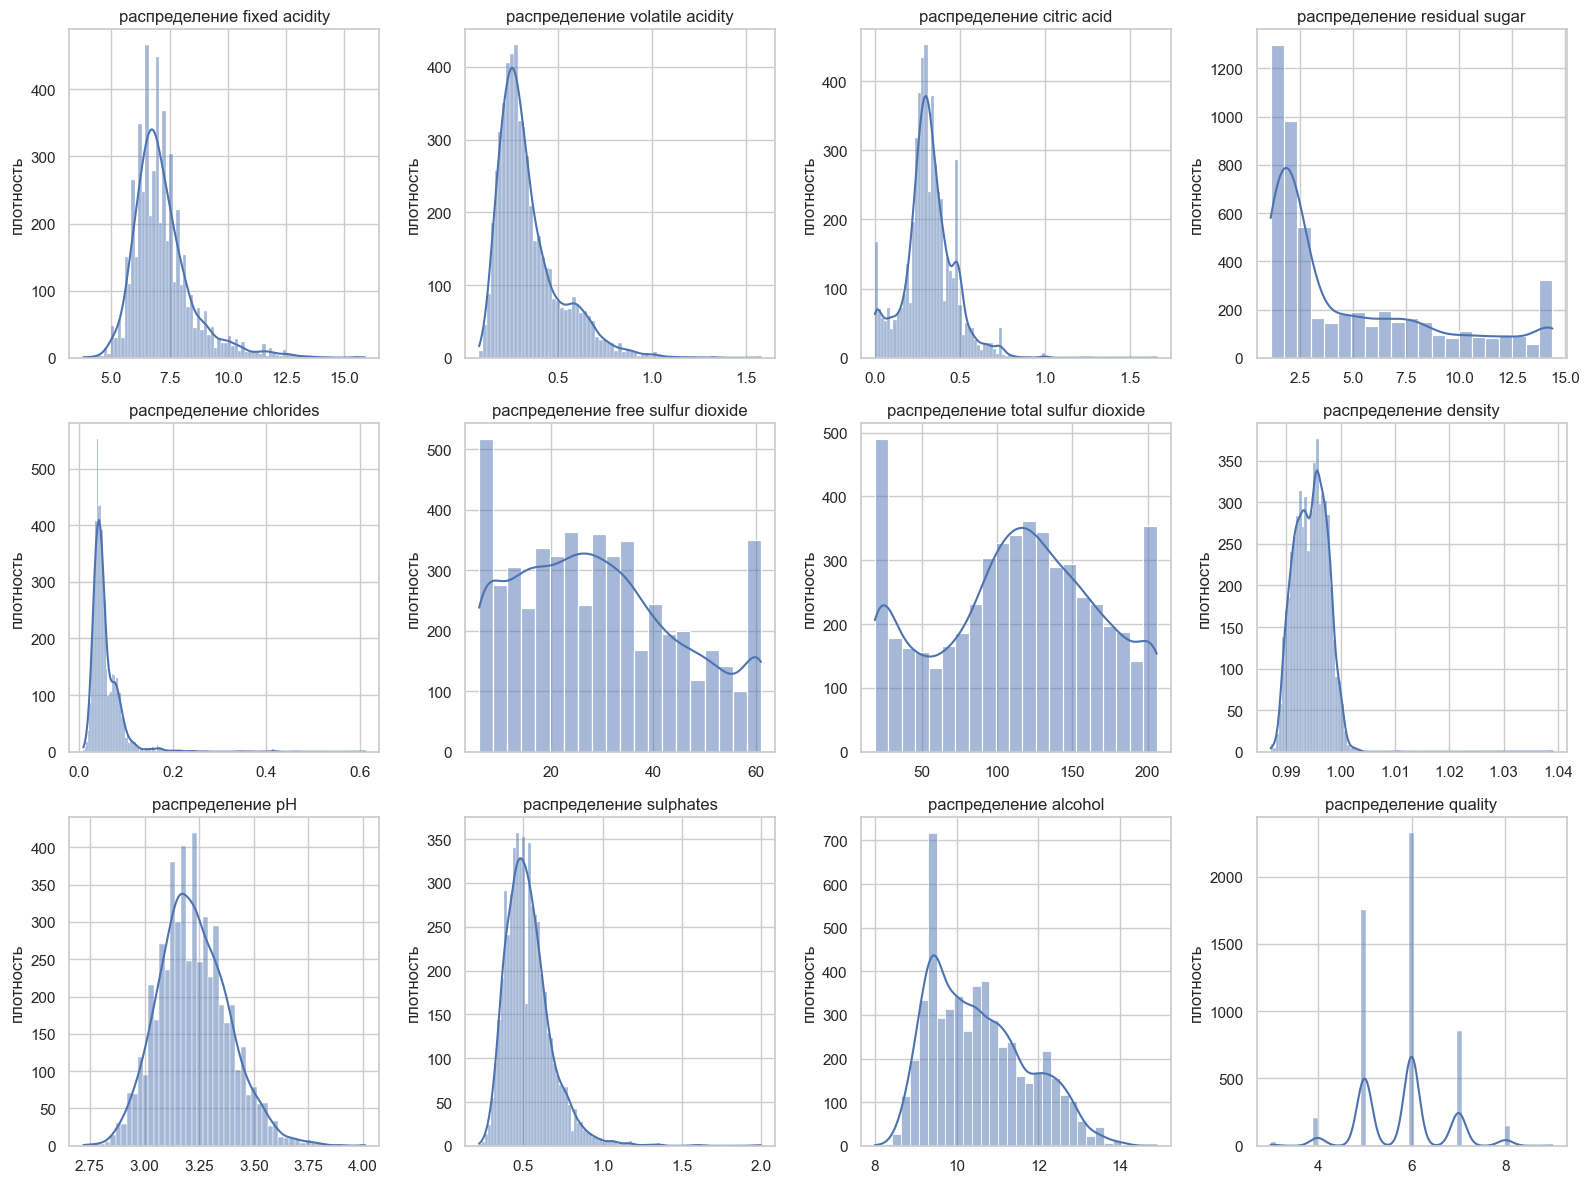

In [8]:
sns.set(style="whitegrid")

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n = len(num_cols)

cols = int(np.ceil(np.sqrt(n)))
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4), sharey=False)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"распределение {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('плотность')

# удаляем лишние оси
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



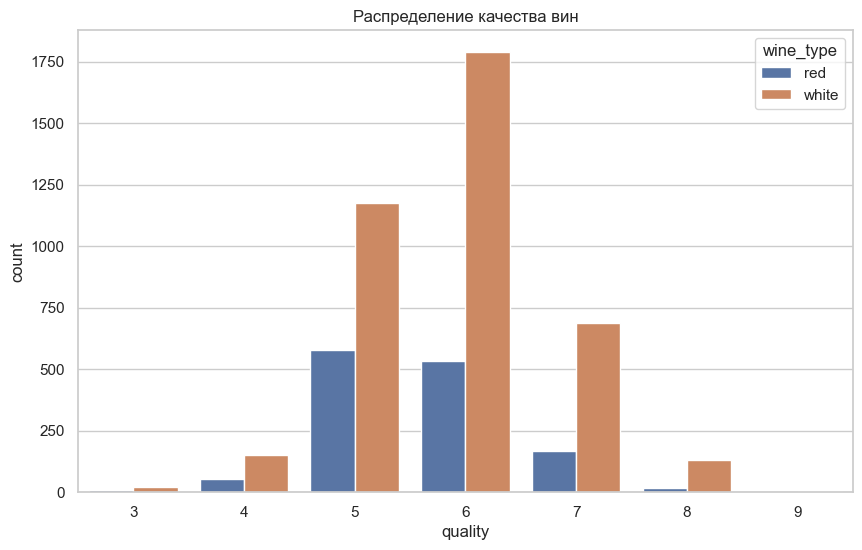

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  wine_type
6.7            0.300             0.44         14.4            0.057      61.0                 206.0                 0.99956  3.11  0.53       9.1      5        white        0.000376
6.6            0.320             0.33         2.5             0.052      40.0                 206.0                 0.99316  3.15  0.60       10.0     5        white        0.000376
7.3            0.200             0.29         14.4            0.039      61.0                 206.0                 1.00037  3.10  0.48       9.2      6        white        0.000376
7.4            0.190             0.30         12.8            0.053      48.5                 206.0                 0.99860  3.14  0.49       9.1      7        white        0.000376
7.9            0.300             0.68         8.3             0.050      37.5                 206.0   

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, hue='wine_type')
plt.title('Распределение качества вин')
plt.show()

#проверка дисбаланса классов
print(df.value_counts(normalize=True))

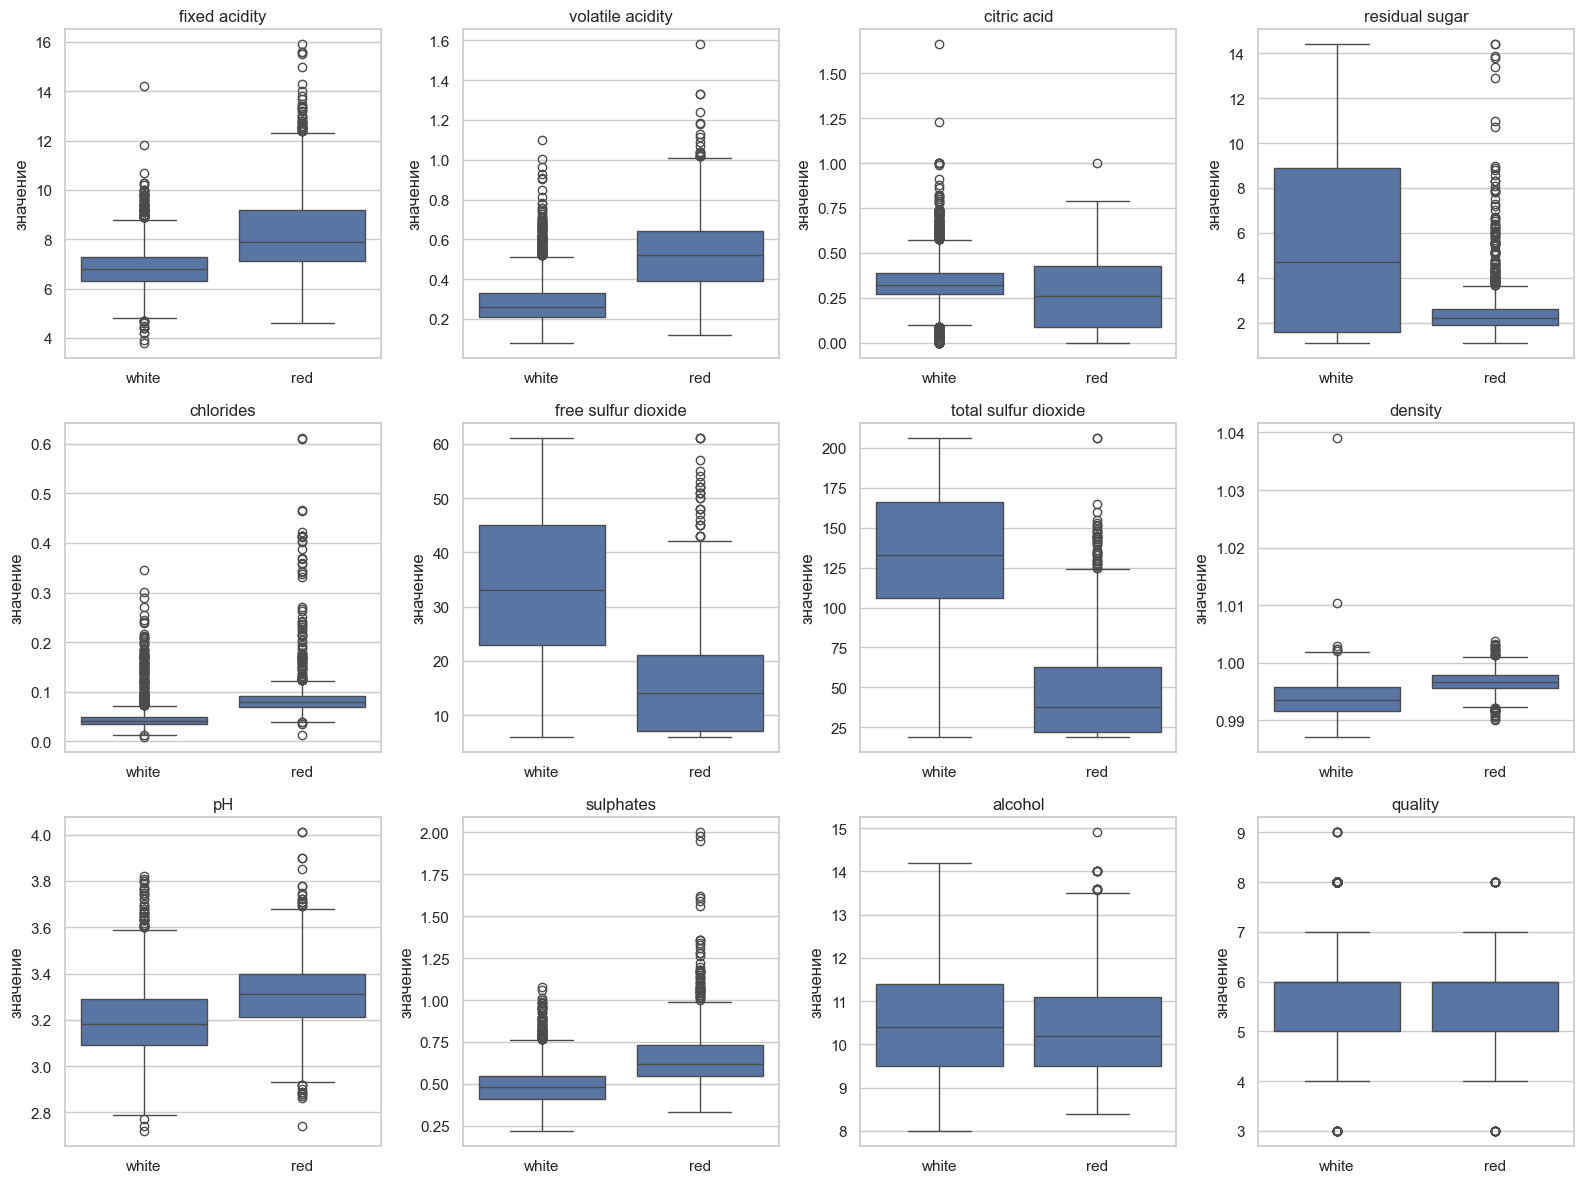

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n = len(num_cols)
cols = int(np.ceil(np.sqrt(n)))
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4), sharey=False)
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x='wine_type', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('значение')
# удаляем лишние оси
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()




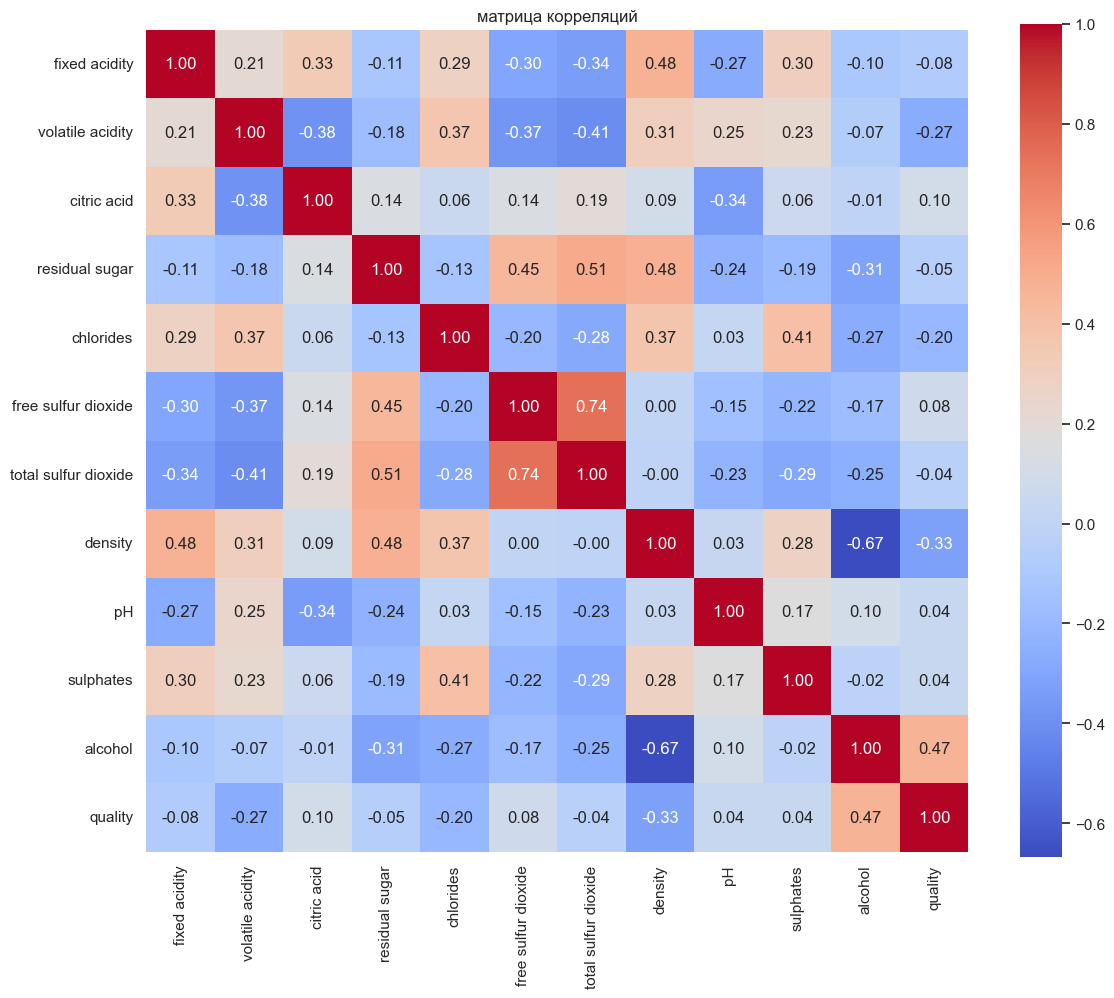

топ скоррелированных пар признаков:


total sulfur dioxide  free sulfur dioxide     0.737546
density               alcohol                 0.667811
total sulfur dioxide  residual sugar          0.505264
density               residual sugar          0.484847
                      fixed acidity           0.478180
quality               alcohol                 0.469422
free sulfur dioxide   residual sugar          0.446240
volatile acidity      total sulfur dioxide    0.413647
chlorides             sulphates               0.405051
volatile acidity      citric acid             0.384192
dtype: float64

In [11]:

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("матрица корреляций")
plt.tight_layout()
plt.show()

# наиболее сильная корреляция
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1].drop_duplicates().head(10)
print("топ скоррелированных пар признаков:")
display(high_corr)

Text(0.5, 1.0, 'Корреляция с качеством вина')

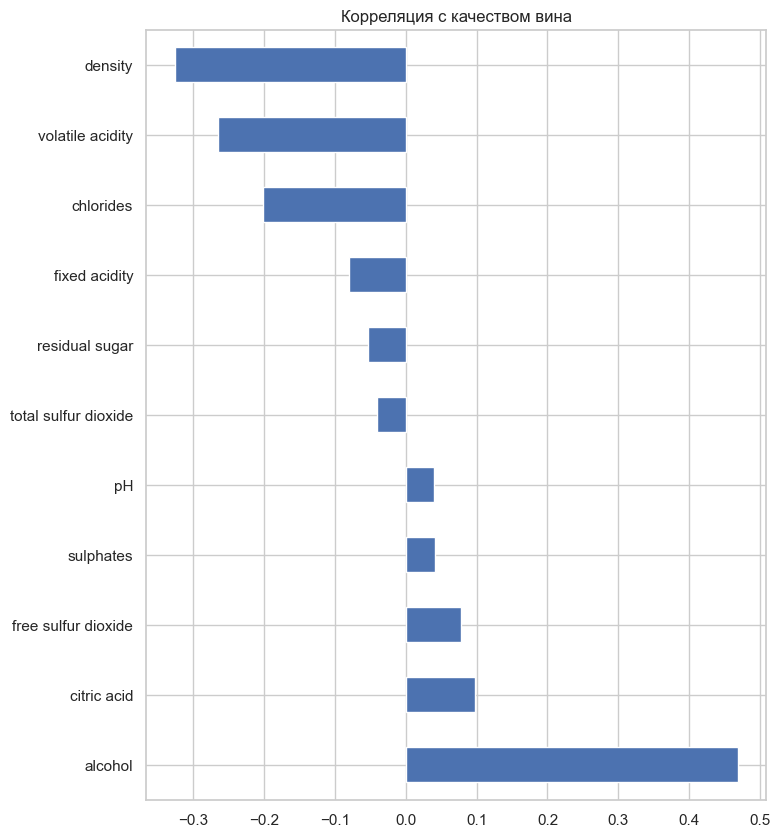

In [12]:
quality_corr = df.select_dtypes(include=[np.number]).corr()['quality'].sort_values(ascending=False)
plt.figure(figsize=(8, 10))
quality_corr.drop('quality').plot.barh()
plt.title('Корреляция с качеством вина')

In [13]:
best_model,best_name,X_train,X_test,y_train,y_test  = train_models(df)

c:\Users\galiy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LinearRegression: R2 = 0.280, MAE = 0.565
DecisionTree: R2 = 0.237, MAE = 0.594
RandomForest: R2 = 0.362, MAE = 0.531
CatBoost: R2 = 0.373, MAE = 0.533


,model,r2,mae
3,CatBoost,0.372882,0.533494
2,RandomForest,0.362429,0.531187
0,LinearRegression,0.279533,0.564826
1,DecisionTree,0.237268,0.593805


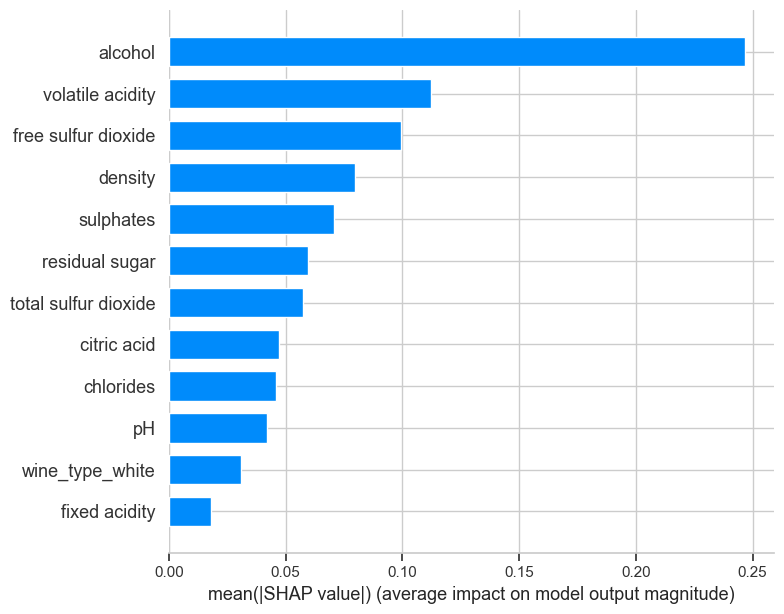

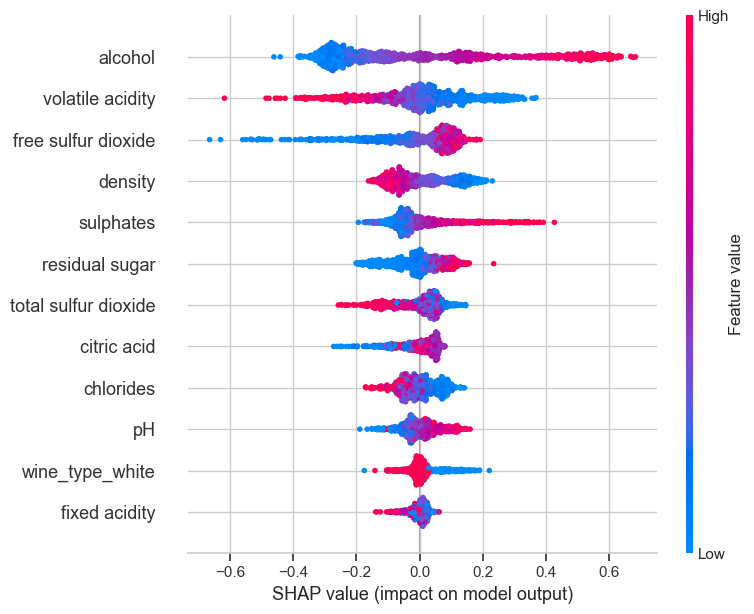

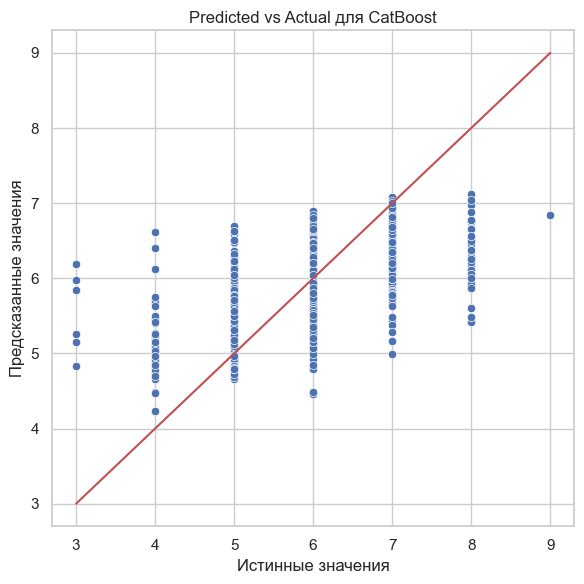

In [14]:
# визуализация важности признаков с помощью SHAP
import shap

model_step = best_model.named_steps['model']
try:
    explainer = shap.TreeExplainer(model_step)
except Exception:
    explainer = shap.Explainer(model_step, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar', show=True)
shap.summary_plot(shap_values, X_test, show=True)

y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Predicted vs Actual для {best_name}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.tight_layout()
plt.show()

In [15]:
X_train['wine_type_white'] = X_train['wine_type_white'].astype(int)
X_test['wine_type_white'] = X_test['wine_type_white'].astype(int)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)


# Создание DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class WineNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            
            nn.Linear(128, 64),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),
            
            nn.Linear(64, 32),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Dropout(0.1),
            
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.net(x)

model = WineNet(X_train.shape[1]).to(device)
criterion = nn.MSELoss() 
optimizer = optim.AdamW(model.parameters(), lr=0.00005, weight_decay=1e-3)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=10
)

train_losses = []
val_losses = []
val_r2 = []
val_mae = []
best_val_loss = float('inf')
patience_counter = 0
patience = 20  # количество эпох для ранней остановки
best_model_state = None

epochs = 200
print("Начало обучения")

epoch_bar = tqdm(range(epochs), desc="Обучение", unit="epoch")

for epoch in epoch_bar:
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # валидация
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor)
        val_mse = criterion(val_preds, y_test_tensor).item()
        val_losses.append(val_mse)
        
        val_preds_np = val_preds.cpu().numpy().flatten()
        y_test_np = y_test.values.flatten()
        mae = mean_absolute_error(y_test_np, val_preds_np)
        val_mae.append(mae)
        
        r2 = r2_score(y_test_np, val_preds_np)
        val_r2.append(r2)
    
    # обновляем scheduler
    scheduler.step(val_mse)
    
    epoch_bar.set_postfix({
        'Train MSE': f'{epoch_loss:.4f}',
        'Val MSE': f'{val_mse:.4f}',
        'Val MAE': f'{mae:.4f}',
        'Val R2': f'{r2:.4f}'
    })
    
    # сохраняем лучшую модель
    if val_mse < best_val_loss:
        best_val_loss = val_mse
        best_model_state = model.state_dict().copy()
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= patience:
        print(f"\nРанняя остановка на эпохе {epoch+1}")
        break

if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Загружено лучшее состояние модели из памяти")

# финальная оценка
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)
    test_preds_np = test_preds.cpu().numpy().flatten()
    
    final_mae = mean_absolute_error(y_test, test_preds_np)
    final_r2 = r2_score(y_test, test_preds_np)

print("\nФинальные метрики:")
print(f"MAE: {final_mae:.4f}")
print(f"R2: {final_r2:.4f}")



Используемое устройство: cuda
Начало обучения


Обучение: 100%|█████████▉| 199/200 [00:25<00:00,  7.66epoch/s, Train MSE=0.9084, Val MSE=0.5272, Val MAE=0.5534, Val R2=0.3193]   


Ранняя остановка на эпохе 200
Загружено лучшее состояние модели из памяти

Финальные метрики:
MAE: 0.5534
R2: 0.3193


### Feedforward Neural Network (PyTorch)

- **Архитектура**  
  Вход: 11 признаков  
  Скрытые:  
  - Linear(11->128) -> LeakyReLU(a=0.01) -> BatchNorm -> Dropout  
  - Linear(128->64) -> LeakyReLU(a=0.01) -> BatchNorm -> Dropout  
  - Linear(64->32) -> LeakyReLU(a=0.01) -> Dropout  
  Выход: Linear(32->1)

- **Прямой проход & обратное распространение**  
  1. **Forward**: вход проходит через все слои -> предсказание.  
  2. **Loss**: считаем MSE между предсказанием и y_true.  
  3. **Backward**: `loss.backward()` вычисляет градиенты по всем параметрам.  
  4. **Step**: `optimizer.step()` обновляет веса по градиенту.

- **LeakyReLU vs ReLU**  
  - ReLU обнуляет отрицательные значения -> "мертвые" нейроны.  
  - LeakyReLU пропускает маленький градиент (a=0.01) для x<0 -> стабильнее обучение.

- **AdamW vs Adam**  
  - Оба — адаптивные оптимизаторы на основе моментов.  
  - **AdamW** добавляет decoupled weight decay (L2‑регуляризацию), что даёт более корректный распад весов и лучшую обобщающую способность.


Вообще обучение не предобученных нейронок на маленьком кол-ве данных дает не особо высокие метрики. +они довольно рандомны, в одном из прогрузов мне удалось достичь метрик:

Начало обучения

Обучение: 100%|██████████| 200/200 [00:24<00:00,  8.08epoch/s, Train MSE=0.6415, Val MSE=0.4746, Val MAE=0.5275, Val R2=0.3873]  

Загружено лучшее состояние модели из памяти

Финальные метрики:

MAE: 0.5275

R2: 0.3873

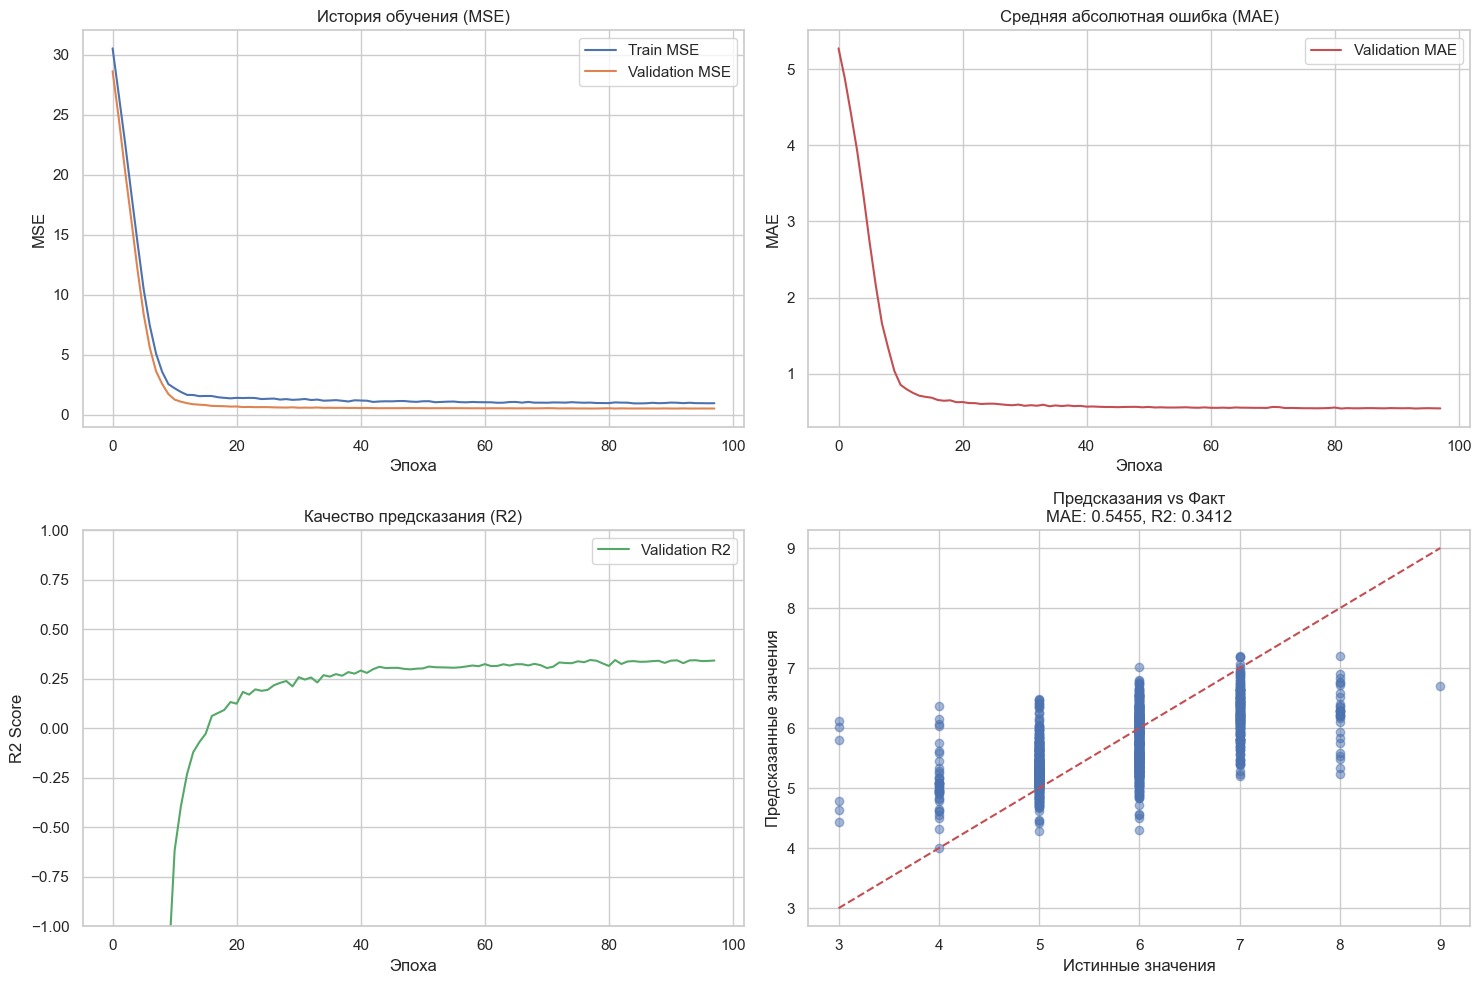

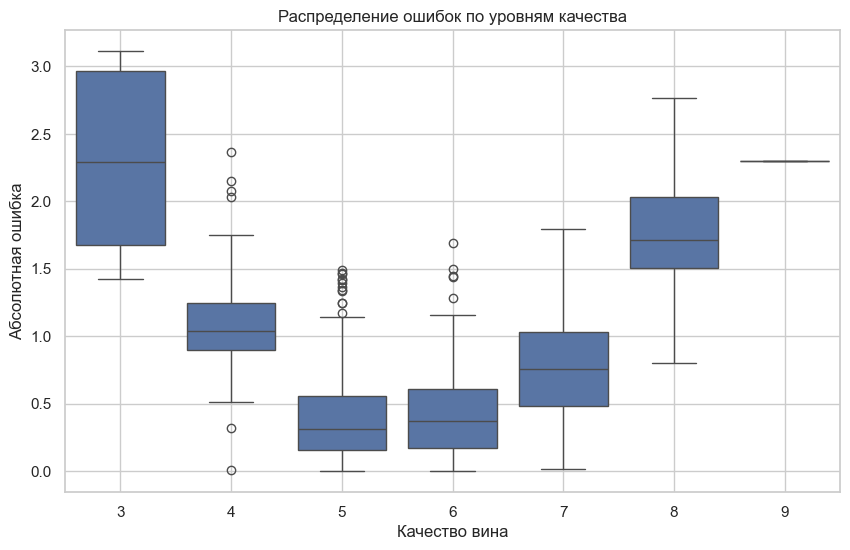

In [17]:
plt.figure(figsize=(15, 10))

# MSE и MAE
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Validation MSE')
plt.title('История обучения (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(val_mae, 'r-', label='Validation MAE')
plt.title('Средняя абсолютная ошибка (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# R2
plt.subplot(2, 2, 3)
plt.plot(val_r2, 'g-', label='Validation R2')
plt.title('Качество предсказания (R2)')
plt.xlabel('Эпоха')
plt.ylabel('R2 Score')
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)

# Предсказания vs Факт
plt.subplot(2, 2, 4)
plt.scatter(y_test, test_preds_np, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Предсказания vs Факт\nMAE: {final_mae:.4f}, R2: {final_r2:.4f}')
plt.grid(True)

plt.tight_layout()
plt.show()

# Анализ ошибок
errors = np.abs(test_preds_np - y_test.values)
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=errors)
plt.xlabel('Качество вина')
plt.ylabel('Абсолютная ошибка')
plt.title('Распределение ошибок по уровням качества')
plt.grid(True)
plt.show()


### Улучшение качества модели при дисбалансе классов

- **Текущая проблема**  
  Часто модель предсказывает оценки близкие к 5/6/7 (больше всего примеров):  
      quality:
* 6:    2836
* 5:    2138
* 7:    1079
* 4:    216
* 8:    193
* 3:     30
* 9:      5


- **Минимальный объём данных**  
Для корректного обучения требуется **не менее 100 примеров** на каждый класс, но при сильном дисбалансе этого часто недостаточно.

- **Data Augmentation**  
1. **Ручной сбор** — дополнительная разметка новых примеров.  
2. **SMOTE** и его модификации — генерация синтетических сэмплов.

- **Предобученные модели**  
- Могли бы помочь при слабом дисбалансе,  
- но специфика задачи и данных усложняет их применение.

### Уменьшение избыточных классов (Downsampling)

- **Метод**  
Сокращение числа примеров крупных классов до уровня редких.  
- **Ограничение**  
Не спасёт классы с экстремально малым объёмом (3 и 9).  
 
Не рекомендуется: потеря ценной информации.

### Эмбеддинги как альтернативный подход

- **Эталонные векторы (без обучения)**  
1. Для каждого класса вычислить медианный эмбеддинг.  
2. Классифицировать по **косинусной схожести** с эталоном.  
- Независим от дисбаланса, не требует обучения.

- **Обучение эмбеддингов (Representation Learning)**  
1. Специальная НН выдаёт векторное представление.  
2. Дальнейшая классификация в эмбеддинг-пространстве.  
- Более точный, но требует дополнительного обучения.



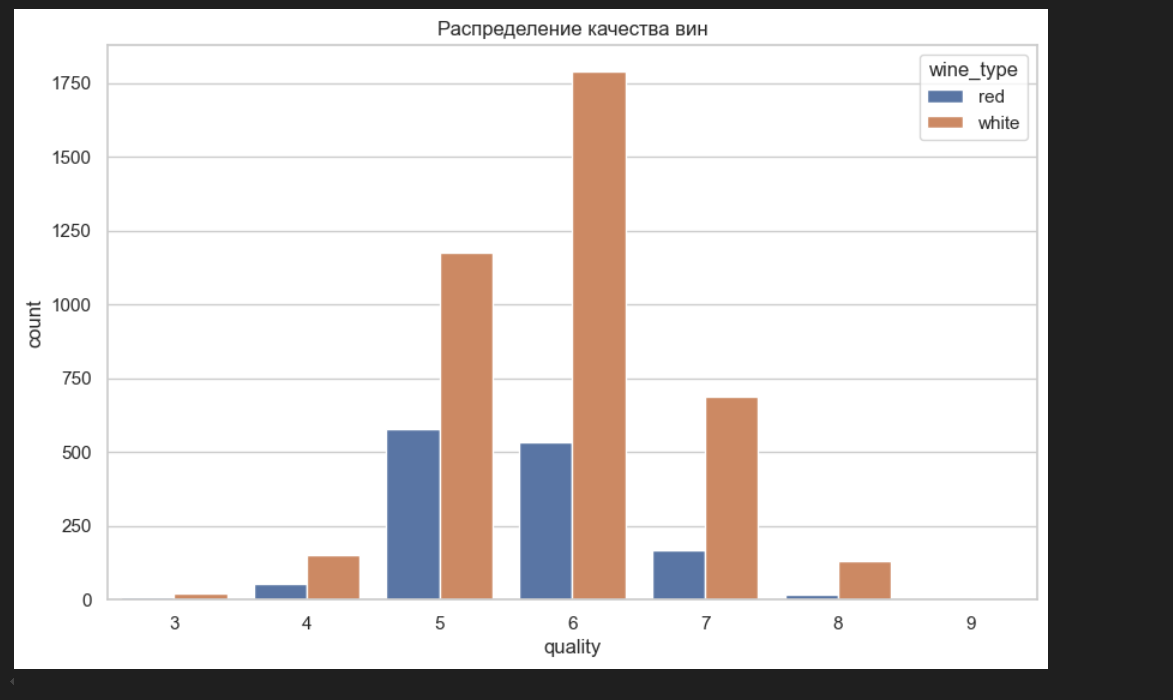